<a href="https://colab.research.google.com/github/3dsoriano/MLB-Offensive-Stats-to-Win-Impact/blob/main/Kings_NBA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

player_df = pd.read_json("/content/player.json")
nba_df = pd.read_json("/content/nba_box_player_season.json")
international_df = pd.read_json("/content/international_box_player_season.json")

# player_df = pd.read_json("/Users/danielsoriano/Downloads/nba/player.json")
# nba_df = pd.read_json("/Users/danielsoriano/Downloads/nba/nba_box_player_season.json")
# international_df = pd.read_json("/Users/danielsoriano/Downloads/nba/international_box_player_season.json")


nba_df['first_name'] = nba_df['first_name'].str.lower()
nba_df['last_name'] = nba_df['last_name'].str.lower()

player_df['birth_year'] = pd.to_datetime(player_df['birth_date']).dt.year

nba_df['last_name'] = nba_df['last_name'].str.replace(r'\s+(jr\.?|sr\.?|iii?|iv)$', '', case=False, regex=True).str.strip().str.split().str[0]

nba_df = nba_df.merge(
    player_df,
    on=['first_name', 'last_name'],
    how='left'
)
nba_df['age'] = nba_df['season'] - nba_df['birth_year']
nba_df = nba_df.drop('birth_year', axis=1)

international_df = international_df.merge(
    player_df,
    on=['first_name', 'last_name'],
    how='left'
)

international_df['age'] = international_df['season'] - international_df['birth_year']
international_df = international_df.drop('birth_year', axis=1)

nba_df = nba_df.sort_values(['first_name', 'last_name', 'season'])
nba_df['year'] = nba_df.groupby(['first_name', 'last_name']).cumcount() + 1

international_df['year'] = international_df.groupby(['first_name', 'last_name']).cumcount() + 1

nba_df = nba_df.sort_values(['first_name', 'last_name', 'year'])
nba_df['avg_internal_box_plus_minus'] = nba_df.groupby(['first_name', 'last_name'])['internal_box_plus_minus'].expanding().mean().reset_index(level=[0,1], drop=True)


international_df = international_df.sort_values(['first_name', 'last_name', 'year'])
#international_df['avg_internal_box_plus_minus'] = international_df.groupby(['first_name', 'last_name'])['internal_box_plus_minus'].expanding().mean().reset_index(level=[0,1], drop=True)
#international_df['avg_internal_box_plus_minus'] = international_df.groupby(['first_name', 'last_name'])['internal_box_plus_minus'].transform('mean')


In [ ]:
international_df['season'].unique()#[international_df['last_name'] == 'atkins']

array([2021, 2012, 2018, 2019, 2020, 2016, 2014, 2015, 2013, 2017, 2010])

In [ ]:
international_players = international_df[['first_name', 'last_name']].drop_duplicates()
nba_players = nba_df[['first_name', 'last_name']].drop_duplicates()
players_in_both = international_players.merge(nba_players, on=['first_name', 'last_name'], how='inner')

# Count number of seasons for each player internationally
international_years = international_df.groupby(['first_name', 'last_name']).size().reset_index()
international_years.columns = ['first_name', 'last_name', 'international_years']

# Count number of seasons for each player in NBA
nba_years = nba_df.groupby(['first_name', 'last_name']).size().reset_index()
nba_years.columns = ['first_name', 'last_name', 'nba_years']

# Merge to get both values
players_timeline = players_in_both.merge(international_years, on=['first_name', 'last_name'])
players_timeline = players_timeline.merge(nba_years, on=['first_name', 'last_name'])

print(f"Number of players in both leagues: {len(players_timeline)}")
players_timeline

int2nba_int = international_df.merge(players_timeline, on=['first_name', 'last_name'], how='inner')
int2nba_int['avg_internal_box_plus_minus'] = int2nba_int.groupby(['first_name', 'last_name'])['internal_box_plus_minus'].transform('mean')

int2nba_nba = nba_df.merge(players_timeline, on=['first_name', 'last_name'], how='inner')

int2nba_int[(int2nba_int['international_years'] > 1) & (int2nba_int['nba_years'] > 1) & (int2nba_int['age'] < 24)].sort_values(by='avg_internal_box_plus_minus', ascending=False).head(20)
# players_timeline


Number of players in both leagues: 477


,first_name,last_name,season,season_type,league,team,games,starts,minutes,points,...,steal_percentage,block_percentage,turnover_percentage,internal_box_plus_minus,birth_date,age,year,international_years,nba_years,avg_internal_box_plus_minus
64,andre,morant,2012,Full Season,EuroLeague,Redhawks,16,15,368.83,200,...,2.1910,1.4009,12.5119,5.1051,1991-03-07,21,1,10,5,6.581120
66,andre,morant,2013,Full Season,EuroLeague,Redhawks,29,25,721.67,330,...,1.5852,3.7602,14.2256,5.6805,1991-03-07,22,3,10,5,6.581120
65,andre,morant,2012,Full Season,Spain - ACB,Redhawks,42,27,818.52,374,...,2.3190,2.1125,9.7938,5.2583,1991-03-07,21,2,10,5,6.581120
69,andre,morant,2014,Full Season,Spain - ACB,Redhawks,43,41,972.74,499,...,2.8007,2.6022,9.8619,5.3035,1991-03-07,23,6,10,5,6.581120
68,andre,morant,2014,Full Season,EuroLeague,Redhawks,31,31,748.01,384,...,2.9262,3.4955,10.1264,8.2451,1991-03-07,23,5,10,5,6.581120
67,andre,morant,2013,Full Season,Spain - ACB,Redhawks,43,39,1007.28,523,...,2.4834,3.7679,11.4358,6.6366,1991-03-07,22,4,10,5,6.581120
1518,sundiata,ladurner,2014,Full Season,Spain - ACB,Knights,35,23,742.81,211,...,1.6661,7.1084,14.0873,3.8162,1992-03-13,22,2,12,2,6.315033
1519,sundiata,ladurner,2015,Full Season,EuroCup,Knights,23,21,497.67,207,...,0.5660,8.7544,16.3094,6.9930,1992-03-13,23,3,12,2,6.315033
1520,sundiata,ladurner,2015,Full Season,Spain - ACB,Knights,36,32,804.98,287,...,2.1105,8.0403,16.4727,2.2769,1992-03-13,23,4,12,2,6.315033
1517,sundiata,ladurner,2013,Full Season,Spain - ACB,Knights,12,1,74.66,18,...,2.0361,9.0789,34.1945,-0.7378,1992-03-13,21,1,12,2,6.315033


In [ ]:
international_df[international_df['last_name'] == 'love']
int2nba_nba[int2nba_nba['last_name'] == 'doyle'].columns

# parrillo = joe ingles
# rice = gobert
# haslem = luka doncic
# brimah = boban
# malmanis = sabonis
# love = Bjelica
# sloan = Bertans
# luwawu-cabarro = pat bev
# may = poirier
# doyle = porzingus

Index(['first_name', 'last_name', 'season', 'season_type', 'league', 'team',
       'games', 'starts', 'minutes', 'points', 'plus_minus', 'two_points_made',
       'two_points_attempted', 'three_points_made', 'three_points_attempted',
       'free_throws_made', 'free_throws_attempted', 'blocked_shot_attempts',
       'offensive_rebounds', 'defensive_rebounds', 'assists', 'screen_assists',
       'turnovers', 'steals', 'deflections', 'loose_balls_recovered',
       'blocked_shots', 'personal_fouls', 'personal_fouls_drawn',
       'offensive_fouls', 'charges_drawn', 'technical_fouls', 'flagrant_fouls',
       'ejections', 'points_off_turnovers', 'points_in_paint',
       'second_chance_points', 'fast_break_points', 'possessions',
       'estimated_possessions', 'calculated_possessions', 'plays_used',
       'team_possessions', 'usage_percentage', 'true_shooting_percentage',
       'three_point_attempt_rate', 'free_throw_rate',
       'offensive_rebounding_percentage', 'defensive_reboundi

In [ ]:
x = int2nba_nba[(int2nba_nba['season'] == 2021) & (int2nba_nba['avg_internal_box_plus_minus'] > -2)].sort_values(by='avg_internal_box_plus_minus', ascending=False).head(20)
# take all these players and i want to look at their international stats
top_player_names = x[['first_name', 'last_name']].drop_duplicates()

top_players_international = international_df.merge(top_player_names, on=['first_name', 'last_name'], how='inner')
top_players_international = top_players_international.sort_values(['first_name', 'last_name', 'season'])
top_players_international.sort_values(by='internal_box_plus_minus', ascending=False)
top_players_international.columns#[top_players_international['last_name'] == 'malmanis']


# parrillo = joe ingles
# rice = gobert
# haslem = luka doncic
# brimah = boban
# love = Bjelica




Index(['first_name', 'last_name', 'season', 'season_type', 'league', 'team',
       'games', 'starts', 'minutes', 'points', 'two_points_made',
       'two_points_attempted', 'three_points_made', 'three_points_attempted',
       'free_throws_made', 'free_throws_attempted', 'blocked_shot_attempts',
       'offensive_rebounds', 'defensive_rebounds', 'assists', 'screen_assists',
       'turnovers', 'steals', 'deflections', 'loose_balls_recovered',
       'blocked_shots', 'personal_fouls', 'personal_fouls_drawn',
       'offensive_fouls', 'charges_drawn', 'technical_fouls', 'flagrant_fouls',
       'ejections', 'points_off_turnovers', 'points_in_paint',
       'second_chance_points', 'fast_break_points', 'possessions',
       'estimated_possessions', 'team_possessions', 'usage_percentage',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_rate', 'offensive_rebounding_percentage',
       'defensive_rebounding_percentage', 'total_rebounding_percentage',
       

In [ ]:
international_players = international_df[['first_name', 'last_name']].drop_duplicates()
nba_players = nba_df[['first_name', 'last_name']].drop_duplicates()

only_international = international_players.merge(
    nba_players,
    on=['first_name', 'last_name'],
    how='left',
    indicator=True
)
only_international = only_international[only_international['_merge'] == 'left_only'].drop('_merge', axis=1)
only_international_stats = international_df.merge(
    only_international,
    on=['first_name', 'last_name'],
    how='inner'
)

only_international_stats = only_international_stats.sort_values(['first_name', 'last_name', 'season'])
young_international_2021 = only_international_stats[
    (only_international_stats['season'] == 2021) &
    (only_international_stats['age'] <= 27)
][['first_name', 'last_name']].drop_duplicates()

young_international_2021
young_international_all_stats = only_international_stats.merge(
    young_international_2021,
    on=['first_name', 'last_name'],
    how='inner'
)

young_international_all_stats = young_international_all_stats.sort_values(['first_name', 'last_name', 'season'])
young_international_all_stats.sort_values(by='games', ascending=False)

young_international_all_stats[(young_international_all_stats['minutes'] > 100) & (young_international_all_stats['year'] > 3)]#['year'].unique()

,first_name,last_name,season,season_type,league,team,games,starts,minutes,points,...,defensive_rebounding_percentage,total_rebounding_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,internal_box_plus_minus,birth_date,age,year
91,colson,guerrero,2021,Full Season,Spain - ACB,Fighting Irish,11,3,116.00,40,...,22.5766,12.6789,17.8319,4.0726,2.9897,18.1928,-5.5715,1994-01-12,27,4
96,conroy,mashburn,2021,Full Season,Spain - ACB,Bluejays,18,12,441.59,203,...,9.7631,6.0739,18.1629,0.8641,0.3884,13.9880,-1.3682,1995-05-04,26,4
334,milko,gene,2021,Full Season,EuroCup,Scarlet Knights,13,8,258.75,82,...,17.2715,12.3357,11.4317,0.8595,1.5705,14.9190,0.3291,1995-08-09,26,4


In [ ]:
scout_players = nba_df[(nba_df['season'] == 2021) & (nba_df['year'] <= 3)][['first_name', 'last_name']]
scout_df = nba_df.merge(scout_players, on=['first_name', 'last_name'], how='inner')

scout_df['avg_box_plus_minus'] = scout_df.groupby(['first_name', 'last_name'])['internal_box_plus_minus'].transform('mean')

scout_df.sort_values(by='avg_box_plus_minus', ascending=False)


,first_name,last_name,season,season_type,league,team,games,starts,minutes,points,...,assist_percentage,steal_percentage,block_percentage,turnover_percentage,internal_box_plus_minus,birth_date,age,year,avg_internal_box_plus_minus,avg_box_plus_minus
35,rod,haslem,2021,Full Season,NBA,Mavericks,32,32,1124.9833,916,...,46.3805,1.1853,1.6396,14.5642,7.3701,1999-01-09,22,3,7.111800,7.111800
33,rod,haslem,2019,Full Season,NBA,Mavericks,72,72,2317.7833,1526,...,33.2457,1.9057,1.0015,14.9933,5.6535,1999-01-09,20,1,5.653500,7.111800
34,rod,haslem,2020,Full Season,NBA,Mavericks,67,67,2261.6667,1945,...,43.9519,1.6564,0.9142,14.9274,8.3118,1999-01-09,21,2,6.982650,7.111800
5,charalampopoulos,may,2021,Full Season,NBA,Celtics,22,2,330.0000,105,...,3.8472,2.4804,0.5193,12.4740,-0.0546,1993-08-26,28,2,0.710800,0.710800
4,charalampopoulos,may,2020,Full Season,NBA,Celtics,49,2,473.3500,166,...,8.7837,2.4682,1.8590,13.5709,1.4762,1993-08-26,27,1,1.476200,0.710800
30,per,bayless,2016,Full Season,NBA,Knicks,2,0,6.2500,6,...,0.0000,0.0000,0.0000,0.0000,5.9341,1992-07-11,24,1,5.934100,0.515600
32,per,bayless,2021,Full Season,NBA,Bucks,25,0,219.9167,56,...,8.6978,1.3974,2.2381,28.9105,-3.1377,1992-07-11,29,3,0.515600,0.515600
31,per,bayless,2020,Full Season,NBA,Bucks,20,2,128.5833,55,...,18.1579,2.4365,1.3172,17.7830,-1.2496,1992-07-11,28,2,2.342250,0.515600
37,scottie,ribas,2021,Full Season,NBA,Nuggets,30,1,488.1667,165,...,14.4974,3.1713,1.1424,14.9450,-0.9333,1991-05-07,30,1,-0.933300,-0.933300
1,abdul,flynn,2021,Full Season,NBA,Raptors,20,0,123.2167,42,...,12.3166,0.8931,0.0000,10.9266,-3.5523,1994-06-26,27,2,-1.091900,-1.091900


In [ ]:
vet_names = nba_df[(nba_df['season'] == 2021) & (nba_df['year'] > 3)][['first_name', 'last_name']]
veteran_players_df = nba_df.merge(vet_names, on=['first_name', 'last_name'], how='inner')

veteran_players_df = veteran_players_df.sort_values(['first_name', 'last_name', 'year'])

veteran_players_df['avg_internal_box_plus_minus'] = veteran_players_df.groupby(['first_name', 'last_name'])['internal_box_plus_minus'].expanding().mean().reset_index(level=[0,1], drop=True)

veteran_players_df.head(8)


,first_name,last_name,season,season_type,league,team,games,starts,minutes,points,...,total_rebounding_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,internal_box_plus_minus,birth_date,age,year,avg_internal_box_plus_minus
0,ahmad,rice,2014,Full Season,NBA,Jazz,45,0,433.7000,104,...,19.8026,3.5228,1.1640,7.4624,23.7741,-2.6543,1992-06-10,22,1,-2.654300
1,ahmad,rice,2015,Full Season,NBA,Jazz,82,37,2158.4167,686,...,20.5649,8.2336,1.8335,7.3363,16.8662,4.1451,1992-06-10,23,2,0.745400
2,ahmad,rice,2016,Full Season,NBA,Jazz,61,60,1932.0333,557,...,21.5634,8.5492,1.3500,6.0712,19.2399,2.1337,1992-06-10,24,3,1.208167
3,ahmad,rice,2017,Full Season,NBA,Jazz,90,90,2989.8000,1241,...,21.9666,6.1987,1.1549,6.4371,14.5057,4.2832,1992-06-10,25,4,1.976925
4,ahmad,rice,2018,Full Season,NBA,Jazz,67,67,2199.1667,901,...,17.9296,7.9191,1.2224,6.4361,15.7426,3.1944,1992-06-10,26,5,2.220420
5,ahmad,rice,2019,Full Season,NBA,Jazz,86,85,2728.7333,1340,...,21.2278,10.6433,1.2264,5.7486,12.3798,5.2320,1992-06-10,27,6,2.722350
6,ahmad,rice,2020,Full Season,NBA,Jazz,75,75,2602.8833,1144,...,21.3278,5.7923,1.3239,4.5241,14.3922,3.2525,1992-06-10,28,7,2.798086
7,ahmad,rice,2021,Full Season,NBA,Jazz,35,35,1066.2000,498,...,22.1339,4.8901,0.9274,7.4892,14.0259,4.3200,1992-06-10,29,8,2.988325


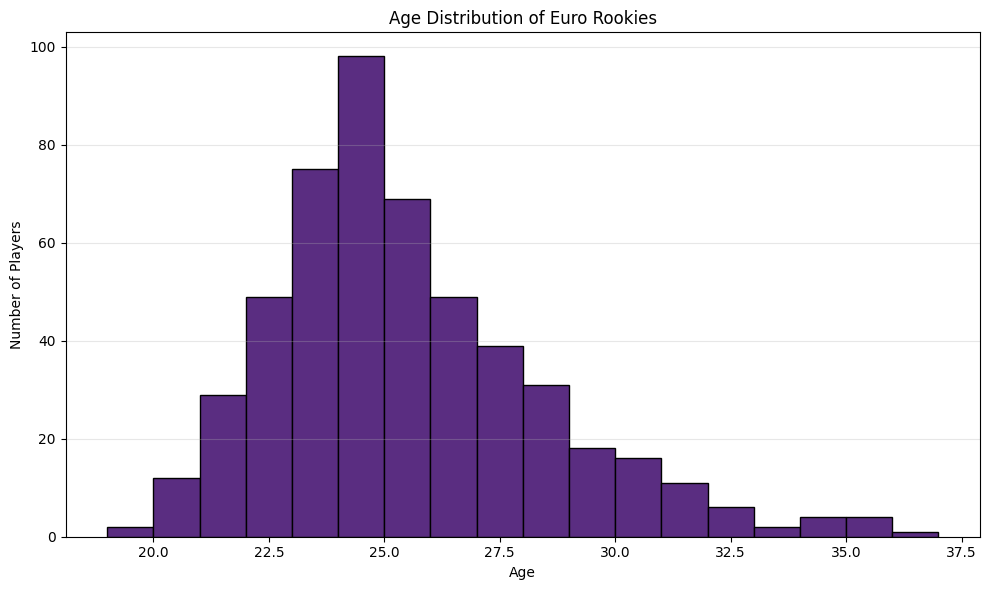

In [ ]:
import matplotlib.pyplot as plt

year1_players = nba_df[nba_df['year'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(year1_players['age'], bins=range(year1_players['age'].min(), year1_players['age'].max() + 2),
         color = '#5a2d81', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Age Distribution of Euro Rookies')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

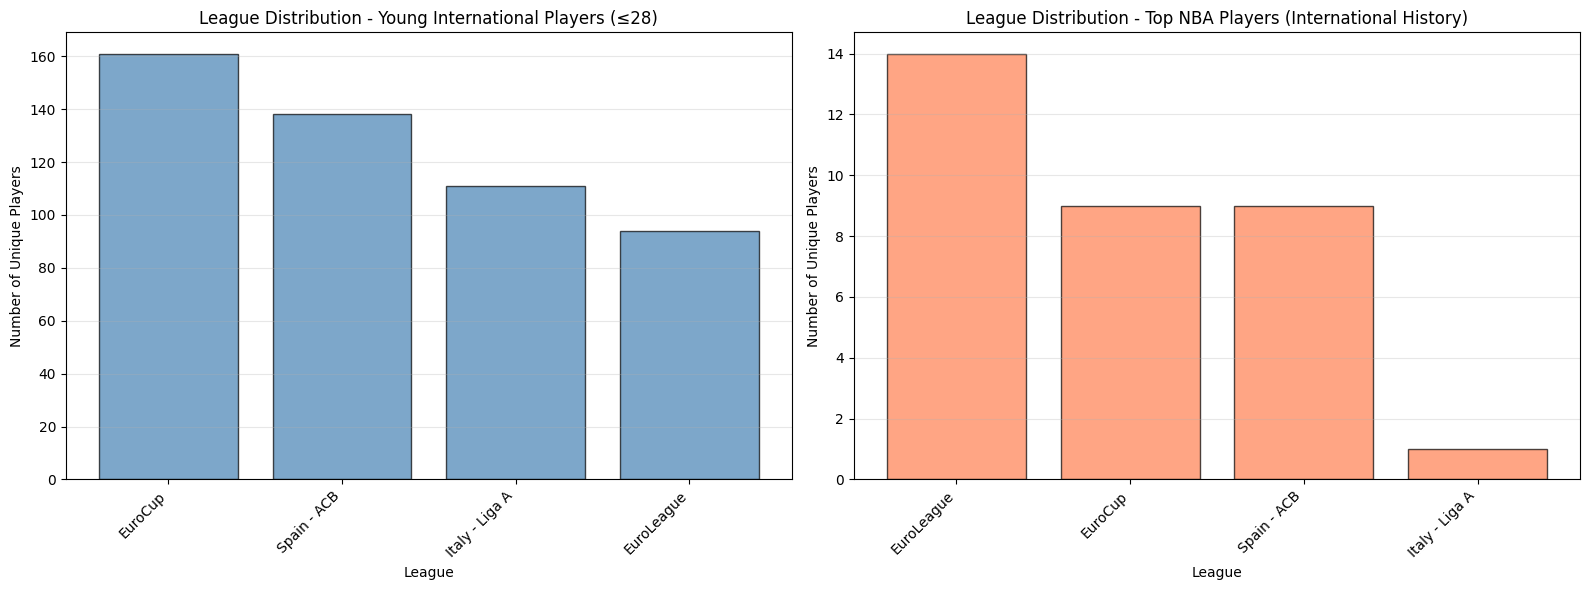

In [ ]:
young_league_counts = young_international_all_stats.groupby('league')[['first_name', 'last_name']].apply(lambda x: len(x.drop_duplicates())).sort_values(ascending=False)

top_league_counts = top_players_international.groupby('league')[['first_name', 'last_name']].apply(lambda x: len(x.drop_duplicates())).sort_values(ascending=False)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for young international players
axes[0].bar(range(len(young_league_counts)), young_league_counts.values,
            edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xticks(range(len(young_league_counts)))
axes[0].set_xticklabels(young_league_counts.index, rotation=45, ha='right')
axes[0].set_xlabel('League')
axes[0].set_ylabel('Number of Unique Players')
axes[0].set_title('League Distribution - Young International Players (≤28)')
axes[0].grid(axis='y', alpha=0.3)

# Plot for top NBA players (international stats)
axes[1].bar(range(len(top_league_counts)), top_league_counts.values,
            edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xticks(range(len(top_league_counts)))
axes[1].set_xticklabels(top_league_counts.index, rotation=45, ha='right')
axes[1].set_xlabel('League')
axes[1].set_ylabel('Number of Unique Players')
axes[1].set_title('League Distribution - Top NBA Players (International History)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def aggregate_player_stats(df, min_games=15, min_minutes=150):
    """
    Aggregate stats across seasons, filtering out players with insufficient data.
    """
    agg_dict = {
        # Counting stats - SUM
        'games': 'sum',
        'minutes': 'sum',
        'points': 'sum',
        'assists': 'sum',
        'offensive_rebounds': 'sum',
        'defensive_rebounds': 'sum',
        'steals': 'sum',
        'blocked_shots': 'sum',
        'turnovers': 'sum',
        'personal_fouls': 'sum',
        'two_points_made': 'sum',
        'two_points_attempted': 'sum',
        'three_points_made': 'sum',
        'three_points_attempted': 'sum',
        'free_throws_made': 'sum',
        'free_throws_attempted': 'sum',

        # Age - MEAN
        'age': 'mean',

        # Rate/percentage stats - MEAN
        'usage_percentage': 'mean',
        'true_shooting_percentage': 'mean',
        'three_point_attempt_rate': 'mean',  # ADD THIS LINE
        'free_throw_rate': 'mean',  # Also add this if you have it
        'offensive_rebounding_percentage': 'mean',
        'defensive_rebounding_percentage': 'mean',
        'total_rebounding_percentage': 'mean',  # Add if you have it
        'assist_percentage': 'mean',
        'steal_percentage': 'mean',
        'block_percentage': 'mean',
        'turnover_percentage': 'mean',
        'internal_box_plus_minus': 'mean'
    }

    player_stats = df.groupby(['first_name', 'last_name']).agg(agg_dict).reset_index()

    # Filter out small samples
    before_count = len(player_stats)
    player_stats = player_stats[
        (player_stats['games'] >= min_games) &
        (player_stats['minutes'] >= min_minutes)
    ]
    after_count = len(player_stats)

    print(f"Players after filtering: {after_count}")
    print(f"Players removed due to small sample: {before_count - after_count}")

    return player_stats

# Engineer features (same as before)
def engineer_features(df):
    """
    Create meaningful basketball metrics from raw stats.
    """
    df = df.copy()

    # Per-game stats
    df['ppg'] = df['points'] / df['games']
    df['rpg'] = (df['offensive_rebounds'] + df['defensive_rebounds']) / df['games']
    df['apg'] = df['assists'] / df['games']
    df['spg'] = df['steals'] / df['games']
    df['bpg'] = df['blocked_shots'] / df['games']
    df['tpg'] = df['turnovers'] / df['games']
    df['mpg'] = df['minutes'] / df['games']

    # Per-36 minute stats
    df['points_per_36'] = (df['points'] / df['minutes']) * 36
    df['assists_per_36'] = (df['assists'] / df['minutes']) * 36
    df['rebounds_per_36'] = ((df['offensive_rebounds'] + df['defensive_rebounds']) / df['minutes']) * 36
    df['steals_per_36'] = (df['steals'] / df['minutes']) * 36
    df['blocks_per_36'] = (df['blocked_shots'] / df['minutes']) * 36

    # Efficiency metrics
    df['assist_to_turnover'] = df['assists'] / (df['turnovers'] + 0.1)
    df['fg2_percentage'] = df['two_points_made'] / (df['two_points_attempted'] + 0.1)
    df['fg3_percentage'] = df['three_points_made'] / (df['three_points_attempted'] + 0.1)
    df['ft_percentage'] = df['free_throws_made'] / (df['free_throws_attempted'] + 0.1)

    # Versatility score
    df['versatility'] = (
        (df['ppg'] > df['ppg'].median()).astype(int) +
        (df['rpg'] > df['rpg'].median()).astype(int) +
        (df['apg'] > df['apg'].median()).astype(int) +
        (df['spg'] > df['spg'].median()).astype(int) +
        (df['bpg'] > df['bpg'].median()).astype(int)
    )

    return df

# NEW: Add sample size confidence adjustment
def add_sample_size_confidence(df):
    """
    Adjust statistics based on sample size using Bayesian shrinkage.
    """
    df = df.copy()

    # Calculate sample size confidence
    games_median = df['games'].median()
    minutes_median = df['minutes'].median()

    df['sample_confidence'] = np.minimum(
        1.0,
        (df['games'] / (games_median * 2)) * 0.5 +
        (df['minutes'] / (minutes_median * 2)) * 0.5
    )

    # Shrink rate stats toward the mean based on confidence
    rate_stats = [
        'true_shooting_percentage', 'usage_percentage', 'three_point_attempt_rate',
        'offensive_rebounding_percentage', 'defensive_rebounding_percentage',
        'assist_percentage', 'steal_percentage', 'block_percentage',
        'turnover_percentage', 'assist_to_turnover'
    ]

    for stat in rate_stats:
        if stat in df.columns:
            league_mean = df[stat].mean()
            df[f'{stat}_adjusted'] = (
                df['sample_confidence'] * df[stat] +
                (1 - df['sample_confidence']) * league_mean
            )

    return df

# NEW: Add uncertainty metrics
def add_uncertainty_metrics(df):
    """
    Calculate confidence based on games and minutes played.
    """
    df = df.copy()

    # Create a combined experience score
    # Normalize games and minutes to 0-100 scale
    games_normalized = 100 * (df['games'] - df['games'].min()) / (df['games'].max() - df['games'].min())
    minutes_normalized = 100 * (df['minutes'] - df['minutes'].min()) / (df['minutes'].max() - df['minutes'].min())

    # Weighted average (games count slightly more than total minutes)
    df['confidence_pct'] = 0.6 * games_normalized + 0.4 * minutes_normalized

    print("\nConfidence Distribution:")
    print(df['confidence_pct'].describe())

    # Use quartiles for even distribution
    q25 = df['confidence_pct'].quantile(0.25)
    q50 = df['confidence_pct'].quantile(0.50)
    q75 = df['confidence_pct'].quantile(0.75)

    df['confidence_tier'] = pd.cut(
        df['confidence_pct'],
        bins=[0, q25, q50, q75, 100],
        labels=['Low', 'Medium', 'High', 'Very High'],
        include_lowest=True
    )

    # Show distribution by tier
    print("\nPlayers per confidence tier:")
    print(df['confidence_tier'].value_counts().sort_index())

    return df
# Apply to both datasets WITH FILTERING
top_players_agg = aggregate_player_stats(top_players_international, min_games=15, min_minutes=200)
top_players_features = engineer_features(top_players_agg)
top_players_features = add_sample_size_confidence(top_players_features)
top_players_features = add_uncertainty_metrics(top_players_features)

young_players_agg = aggregate_player_stats(young_international_all_stats, min_games=15, min_minutes=200)
young_players_features = engineer_features(young_players_agg)
young_players_features = add_sample_size_confidence(young_players_features)
young_players_features = add_uncertainty_metrics(young_players_features)

Players after filtering: 14
Players removed due to small sample: 6

Confidence Distribution:
count     14.000000
mean      34.099995
std       33.251502
min        0.638298
25%        2.950926
50%       27.742964
75%       50.925025
max      100.000000
Name: confidence_pct, dtype: float64

Players per confidence tier:
confidence_tier
Low          4
Medium       3
High         3
Very High    4
Name: count, dtype: int64
Players after filtering: 142
Players removed due to small sample: 283

Confidence Distribution:
count    142.000000
mean      18.020360
std       15.095579
min        0.000000
25%        7.963646
50%       13.745788
75%       24.043236
max      100.000000
Name: confidence_pct, dtype: float64

Players per confidence tier:
confidence_tier
Low          36
Medium       35
High         35
Very High    36
Name: count, dtype: int64


In [ ]:
# Define all potential features
potential_features = [
    'age',
    'points_per_36',
    'assists_per_36',
    'rebounds_per_36',
    'steals_per_36',
    'blocks_per_36',
    'usage_percentage_adjusted',
    'true_shooting_percentage_adjusted',
    'assist_to_turnover_adjusted',
    'three_point_attempt_rate_adjusted',
    'free_throw_rate_adjusted',
    'offensive_rebounding_percentage_adjusted',
    'defensive_rebounding_percentage_adjusted',
    'assist_percentage_adjusted',
    'steal_percentage_adjusted',
    'block_percentage_adjusted',
    'turnover_percentage_adjusted',
    'internal_box_plus_minus',
    'mpg',
    'versatility'
]

# Only use features that exist in both datasets
clustering_features = [
    f for f in potential_features
    if f in top_players_features.columns and f in young_players_features.columns
]

print(f"\nUsing {len(clustering_features)} features for clustering:")
print(clustering_features)

# Handle missing values
top_players_clustering = top_players_features[clustering_features].fillna(0)
young_players_clustering = young_players_features[clustering_features].fillna(0)


Using 19 features for clustering:
['age', 'points_per_36', 'assists_per_36', 'rebounds_per_36', 'steals_per_36', 'blocks_per_36', 'usage_percentage_adjusted', 'true_shooting_percentage_adjusted', 'assist_to_turnover_adjusted', 'three_point_attempt_rate_adjusted', 'offensive_rebounding_percentage_adjusted', 'defensive_rebounding_percentage_adjusted', 'assist_percentage_adjusted', 'steal_percentage_adjusted', 'block_percentage_adjusted', 'turnover_percentage_adjusted', 'internal_box_plus_minus', 'mpg', 'versatility']


In [ ]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
top_players_scaled = scaler.fit_transform(top_players_clustering)
young_players_scaled = scaler.transform(young_players_clustering)  # Use same scaling

# Store scaled data back in dataframes for easier manipulation
top_players_scaled_df = pd.DataFrame(
    top_players_scaled,
    columns=clustering_features,
    index=top_players_clustering.index
)

young_players_scaled_df = pd.DataFrame(
    young_players_scaled,
    columns=clustering_features,
    index=young_players_clustering.index
)

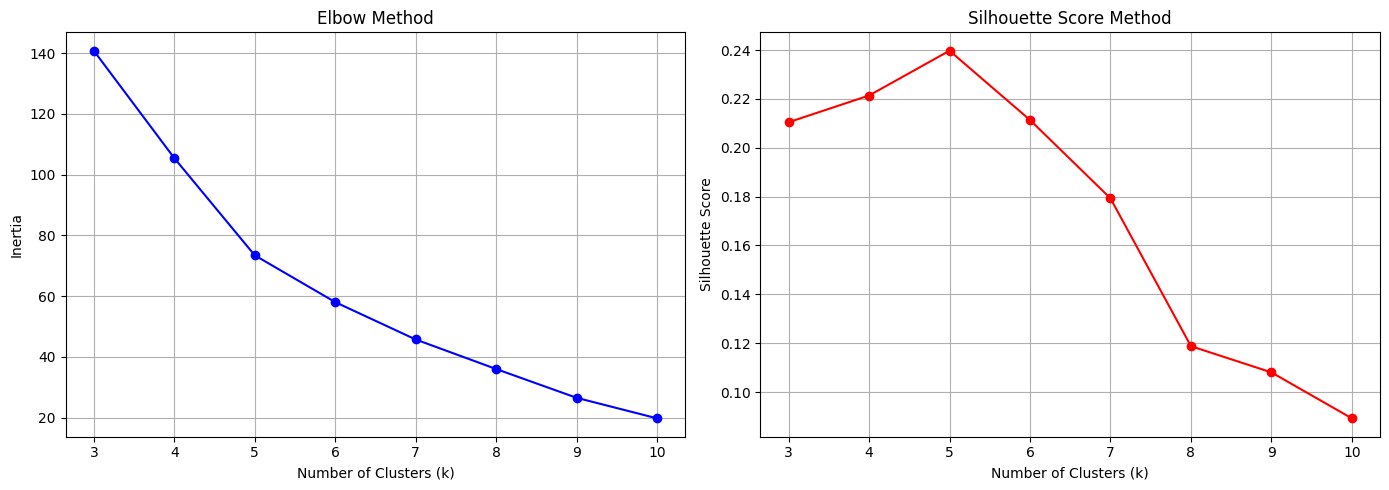

Suggested number of clusters based on silhouette score: 5


In [ ]:
from sklearn.metrics import silhouette_score

# Test different numbers of clusters
inertias = []
silhouette_scores = []
K_range = range(3, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(top_players_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(top_players_scaled, kmeans.labels_))

# Plot to visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Method')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Suggested number of clusters based on silhouette score:",
      K_range[np.argmax(silhouette_scores)])

In [ ]:
# Choose optimal k (let's say 5 for this example - adjust based on Step 4)
optimal_k = 5

# Fit KMeans on successful NBA players
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
top_players_features['cluster'] = kmeans.fit_predict(top_players_scaled)

# Assign young players to nearest cluster
young_players_features['cluster'] = kmeans.predict(young_players_scaled)

In [ ]:
# Analyze what each cluster represents
def profile_clusters(df, cluster_col='cluster'):
    """
    Create profiles for each cluster showing average stats.
    """
    profiles = df.groupby(cluster_col)[clustering_features].mean()

    # Add cluster size
    profiles['player_count'] = df.groupby(cluster_col).size()

    return profiles

cluster_profiles = profile_clusters(top_players_features)

# Give each cluster a descriptive name based on characteristics
def name_clusters(profiles):
    """
    Automatically name clusters based on their dominant characteristics.
    """
    cluster_names = {}

    for cluster_id in profiles.index:
        profile = profiles.loc[cluster_id]

        # Identify dominant traits
        traits = []

        if profile['points_per_36'] > profiles['points_per_36'].mean() * 1.2:
            traits.append("Scorer")
        if profile['assists_per_36'] > profiles['assists_per_36'].mean() * 1.2:
            traits.append("Playmaker")
        if profile['rebounds_per_36'] > profiles['rebounds_per_36'].mean() * 1.2:
            traits.append("Rebounder")
        if profile['blocks_per_36'] > profiles['blocks_per_36'].mean() * 1.2:
            traits.append("Rim Protector")
        if profile['steals_per_36'] > profiles['steals_per_36'].mean() * 1.2:
            traits.append("Defender")
        if profile['three_point_attempt_rate_adjusted'] > profiles['three_point_attempt_rate_adjusted'].mean() * 1.2:
            traits.append("Shooter")
        if profile['versatility'] > profiles['versatility'].mean() * 1.1:
            traits.append("All-Around")

        if not traits:
            traits = ["Role Player"]

        cluster_names[cluster_id] = " / ".join(traits[:2])  # Take top 2 traits

    return cluster_names

cluster_names = name_clusters(cluster_profiles)
print("\nCluster Archetypes:")
for cluster_id, name in cluster_names.items():
    count = cluster_profiles.loc[cluster_id, 'player_count']
    print(f"Cluster {cluster_id}: {name} (n={int(count)})")

# Display detailed profiles
print("\nDetailed Cluster Profiles:")
cluster_profiles.round(2)


Cluster Archetypes:
Cluster 0: Defender / All-Around (n=4)
Cluster 1: Rebounder / Rim Protector (n=3)
Cluster 2: Shooter (n=2)
Cluster 3: Rim Protector (n=4)
Cluster 4: Playmaker / Shooter (n=1)

Detailed Cluster Profiles:


,age,points_per_36,assists_per_36,rebounds_per_36,steals_per_36,blocks_per_36,usage_percentage_adjusted,true_shooting_percentage_adjusted,assist_to_turnover_adjusted,three_point_attempt_rate_adjusted,offensive_rebounding_percentage_adjusted,defensive_rebounding_percentage_adjusted,assist_percentage_adjusted,steal_percentage_adjusted,block_percentage_adjusted,turnover_percentage_adjusted,internal_box_plus_minus,mpg,versatility,player_count
cluster,,,,,,,,,,,,,,,,,,,,
0,24.92,17.17,2.63,6.71,2.20,0.54,20.50,0.60,1.05,0.36,7.76,21.04,11.40,2.58,2.75,14.36,6.70,26.04,4.00,4
1,21.94,18.45,1.17,12.60,0.80,2.03,20.72,0.61,0.85,0.23,10.15,22.89,10.00,2.23,3.83,15.04,6.24,20.41,3.00,3
2,24.11,13.20,2.34,4.29,1.06,0.46,18.50,0.57,1.27,0.56,3.22,13.84,11.91,1.89,1.34,14.52,1.93,19.87,1.50,2
3,21.50,14.24,1.07,7.65,1.23,1.33,19.89,0.58,0.70,0.24,9.21,19.23,8.56,2.09,3.87,15.41,-0.18,15.07,1.25,4
4,17.71,16.49,6.24,7.72,1.35,0.55,21.03,0.59,1.89,0.50,5.87,21.76,23.38,1.68,1.48,20.29,2.55,19.42,2.00,1


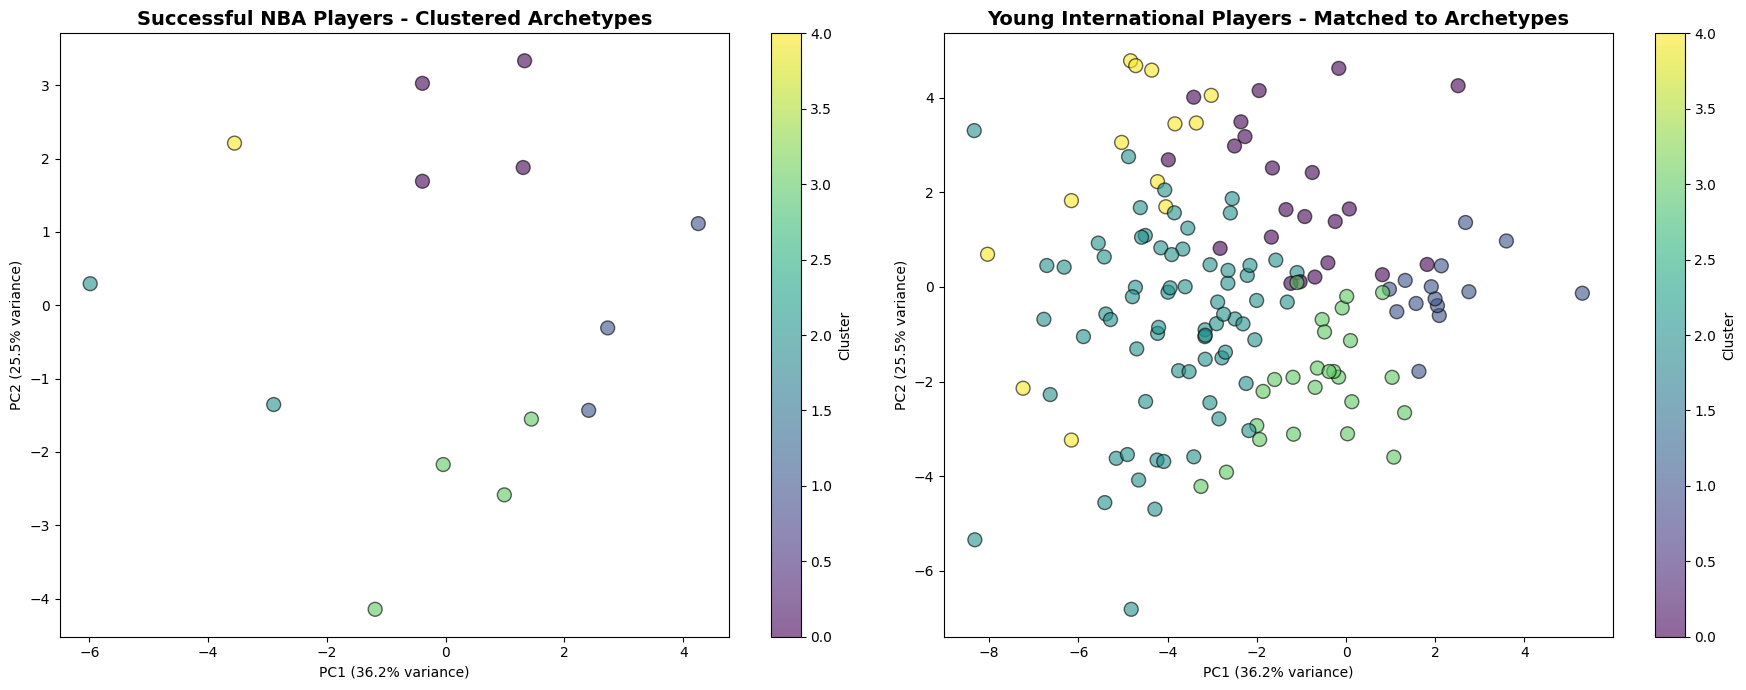


PCA explains 61.7% of total variance


In [ ]:
# Use PCA to visualize in 2D
pca = PCA(n_components=2)
top_players_pca = pca.fit_transform(top_players_scaled)
young_players_pca = pca.transform(young_players_scaled)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot successful NBA players
scatter1 = ax1.scatter(
    top_players_pca[:, 0],
    top_players_pca[:, 1],
    c=top_players_features['cluster'],
    cmap='viridis',
    s=100,
    alpha=0.6,
    edgecolors='black'
)
ax1.set_title('Successful NBA Players - Clustered Archetypes', fontsize=14, fontweight='bold')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Plot young international players
scatter2 = ax2.scatter(
    young_players_pca[:, 0],
    young_players_pca[:, 1],
    c=young_players_features['cluster'],
    cmap='viridis',
    s=100,
    alpha=0.6,
    edgecolors='black'
)
ax2.set_title('Young International Players - Matched to Archetypes', fontsize=14, fontweight='bold')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()

print(f"\nPCA explains {pca.explained_variance_ratio_.sum():.1%} of total variance")

In [ ]:
from scipy.spatial.distance import cdist

# MODIFIED: Include sample size in scoring
def score_young_players_with_sample_adjustment(young_df, top_df, young_scaled, top_scaled, kmeans_model):
    """
    Score young players with sample size adjustment.
    """
    young_df = young_df.copy()

    # Distance to cluster center
    cluster_centers = kmeans_model.cluster_centers_
    young_df['distance_to_center'] = [
        np.linalg.norm(young_scaled[i] - cluster_centers[young_df.iloc[i]['cluster']])
        for i in range(len(young_df))
    ]

    top_df_temp = top_df.copy()
    top_df_temp['distance_to_center'] = [
        np.linalg.norm(top_scaled[i] - cluster_centers[top_df.iloc[i]['cluster']])
        for i in range(len(top_df))
    ]

    avg_distances = top_df_temp.groupby('cluster')['distance_to_center'].mean()

    young_df['relative_fit'] = young_df.apply(
        lambda row: 1 - (row['distance_to_center'] / avg_distances[row['cluster']]),
        axis=1
    )

    # Age factor
    age_mean = young_df['age'].mean()
    young_df['age_factor'] = 1 + ((age_mean - young_df['age']) / age_mean) * 0.2

    # SAMPLE SIZE FACTOR - Use the confidence score we already calculated
    games_percentile = young_df['games'].rank(pct=True)
    minutes_percentile = young_df['minutes'].rank(pct=True)

    young_df['sample_quality'] = 0.5 + 0.5 * (
        0.5 * games_percentile + 0.5 * minutes_percentile
    )

    # MODIFIED: Final score includes sample quality
    young_df['nba_potential_score'] = (
        young_df['relative_fit'] * 0.5 +       # 50% fit to archetype
        young_df['age_factor'] * 0.25 +        # 25% age factor
        young_df['sample_quality'] * 0.25      # 25% sample quality
    ) * 100

    young_df['archetype'] = young_df['cluster'].map(cluster_names)

    return young_df

# Apply the modified scoring function
young_players_scored = score_young_players_with_sample_adjustment(
    young_players_features,
    top_players_features,
    young_players_scaled,
    top_players_scaled,
    kmeans
)

# MODIFIED: Display includes sample size info
top_prospects = young_players_scored.nlargest(20, 'nba_potential_score')[
    ['first_name', 'last_name', 'age', 'games', 'minutes', 'confidence_tier',
     'archetype', 'nba_potential_score', 'ppg', 'apg', 'rpg',
     'true_shooting_percentage', 'internal_box_plus_minus']
].reset_index(drop=True)

print("\n" + "="*80)
print("TOP 20 NBA PROSPECTS (with Sample Size Confidence)")
print("="*80)
top_prospects.sort_values('confidence_tier', ascending=False)#[top_prospects['confidence_tier']]
young_players_scored


TOP 20 NBA PROSPECTS (with Sample Size Confidence)


,first_name,last_name,games,minutes,points,assists,offensive_rebounds,defensive_rebounds,steals,blocked_shots,...,assist_to_turnover_adjusted,confidence_pct,confidence_tier,cluster,distance_to_center,relative_fit,age_factor,sample_quality,nba_potential_score,archetype
3,ahmet safa,font,31,565.56,242,18,21,68,12,4,...,0.681354,25.618098,Very High,2,4.911718,-7.696752e-01,0.982838,0.871479,7.874156e+00,Shooter
11,almond,gudaitis,20,339.03,118,8,12,36,10,2,...,0.943726,8.467943,Medium,2,3.966205,-4.290100e-01,0.982838,0.677817,2.006586e+01,Shooter
12,alpert,magarity,23,489.71,215,24,27,86,12,10,...,1.573292,15.629584,High,2,4.812504,-7.339288e-01,0.990881,0.789613,7.815895e+00,Shooter
14,amar'e,webber,42,1036.68,454,159,16,61,67,3,...,1.457379,49.603431,Very High,4,10.089858,-2.272034e+16,0.990881,0.981514,-1.136017e+18,Playmaker / Shooter
17,anton,bornn,18,320.23,182,11,12,26,13,3,...,0.880062,5.975356,Low,0,4.840463,-1.073432e+00,0.998924,0.600352,-1.368970e+01,Defender / All-Around
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,yante,queeley,16,470.00,206,15,23,93,7,0,...,0.806297,8.193533,Medium,2,5.394463,-9.436067e-01,1.015010,0.634683,-5.938010e+00,Shooter
415,yue,magassa,44,723.80,278,25,50,93,20,9,...,0.604948,42.827072,Very High,3,5.810751,-1.444223e+00,0.990881,0.958627,-2.347345e+01,Rim Protector
418,zeljko,bembry,19,535.00,214,108,13,42,25,0,...,1.789992,12.960807,Medium,4,6.554156,-1.475865e+16,0.982838,0.735915,-7.379324e+17,Playmaker / Shooter
423,zugic,prepelic,46,839.59,268,77,48,161,38,19,...,1.012459,48.030089,Very High,3,7.397534,-2.111684e+00,0.982838,0.981514,-5.647540e+01,Rim Protector


In [ ]:
def find_similar_nba_players(young_player_idx, young_scaled, top_scaled, top_df, n=5):
    """
    Find the most similar successful NBA players for a given young player.
    """
    # Calculate distances to all NBA players
    distances = cdist(
        young_scaled[young_player_idx].reshape(1, -1),
        top_scaled
    )[0]

    # Get indices of most similar players
    similar_indices = distances.argsort()[:n]

    similar_players = top_df.iloc[similar_indices][[
        'first_name', 'last_name', 'cluster', 'ppg', 'apg', 'rpg',
        'true_shooting_percentage', 'internal_box_plus_minus'
    ]].copy()

    similar_players['similarity_score'] = 100 * (1 - distances[similar_indices] / distances.max())

    return similar_players

# Example: Find comparisons for top 5 prospects
print("\n" + "="*80)
print("NBA PLAYER COMPARISONS FOR TOP PROSPECTS")
print("="*80)

for i in range(min(5, len(young_players_scored))):
    prospect_idx = young_players_scored.nlargest(20, 'nba_potential_score').index[i]
    prospect_name = f"{young_players_features.loc[prospect_idx, 'first_name']} {young_players_features.loc[prospect_idx, 'last_name']}"

    print(f"\n{i+1}. {prospect_name}")
    print(f"   Archetype: {young_players_scored.loc[prospect_idx, 'archetype']}")
    print(f"   NBA Potential Score: {young_players_scored.loc[prospect_idx, 'nba_potential_score']:.1f}")
    print(f"   Similar NBA Players:")

    # Find position of this player in the scored dataframe
    young_idx = young_players_scored.index.get_loc(prospect_idx)

    similar = find_similar_nba_players(
        young_idx,
        young_players_scaled,
        top_players_scaled,
        top_players_features
    )

    for j, (idx, player) in enumerate(similar.iterrows(), 1):
        print(f"      {j}. {player['first_name']} {player['last_name']} "
              f"({player['similarity_score']:.0f}% match)")


# parrillo = joe ingles
# rice = gobert
# haslem = luka doncic
# brimah = boban
# malmanis = sabonis
# love = Bjelica
# sloan = Bertans
# luwawu-cabarro = pat bev
# may = poirier
# doyle = porzingus


NBA PLAYER COMPARISONS FOR TOP PROSPECTS

1. diener sun
   Archetype: Shooter
   NBA Potential Score: 45.1
   Similar NBA Players:
      1. carrington sloan (60% match)
      2. per bayless (53% match)
      3. delia parrillo (48% match)
      4. roberts malmanis (45% match)
      5. horton joseph (38% match)

2. dary-sagnes blue
   Archetype: Rim Protector
   NBA Potential Score: 39.9
   Similar NBA Players:
      1. horton joseph (63% match)
      2. evan doyle (61% match)
      3. per bayless (58% match)
      4. ladontae barnes (50% match)
      5. roberts malmanis (47% match)

3. johnathan zeller
   Archetype: Shooter
   NBA Potential Score: 38.0
   Similar NBA Players:
      1. carrington sloan (69% match)
      2. per bayless (42% match)
      3. delia parrillo (42% match)
      4. aleksandar love (39% match)
      5. marcquise ofoegbu (34% match)

4. balbay battie
   Archetype: Rim Protector
   NBA Potential Score: 35.1
   Similar NBA Players:
      1. horton joseph (60% match

In [ ]:
# MODIFIED: Include sample size metrics in export
report = young_players_scored[[
    'first_name', 'last_name', 'age', 'games', 'minutes',
    'confidence_tier', 'confidence_pct', 'sample_quality',
    'archetype', 'cluster', 'nba_potential_score',
    'relative_fit', 'distance_to_center',
    'ppg', 'apg', 'rpg', 'spg', 'bpg',
    'true_shooting_percentage', 'usage_percentage',
    'assist_to_turnover', 'internal_box_plus_minus'
]].sort_values('nba_potential_score', ascending=False)

# report.to_csv('nba_prospect_rankings.csv', index=False)
# print("\n✓ Results exported to 'nba_prospect_rankings.csv'")

In [ ]:
# Display top 5 for each archetype separately
archetypes = young_players_scored['archetype'].unique()

for archetype in sorted(archetypes):
    print("\n" + "="*80)
    print(f"ARCHETYPE: {archetype.upper()}")
    print("="*80)

    top_5 = (
        young_players_scored[young_players_scored['archetype'] == archetype]
        .nlargest(5, 'nba_potential_score')
        [['first_name', 'last_name', 'age', 'nba_potential_score',
          'ppg', 'apg', 'rpg', 'spg', 'bpg', 'true_shooting_percentage']]
        .reset_index(drop=True)
    )

    top_5.index = top_5.index + 1  # Start numbering from 1
    print(top_5.to_string())
    print(f"\nTotal players in this archetype: {(young_players_scored['archetype'] == archetype).sum()}")


ARCHETYPE: DEFENDER / ALL-AROUND
  first_name last_name   age  nba_potential_score        ppg       apg       rpg       spg       bpg  true_shooting_percentage
1      hiram    harden  25.0            20.384434  10.588235  1.235294  4.882353  1.117647  0.235294                    0.6119
2      dogus  beaubois  26.0            19.904545   9.222222  0.500000  6.000000  1.000000  0.611111                    0.5867
3     mattia  o'bryant  25.0             3.584226   9.947368  1.315789  3.894737  1.263158  0.947368                    0.5819
4    gaffney   bozeman  24.0             1.283034  13.111111  3.666667  6.611111  1.222222  0.777778                    0.5920
5      loren   hinrich  25.0            -1.394088   8.714286  1.047619  4.095238  0.714286  0.428571                    0.6098

Total players in this archetype: 22

ARCHETYPE: PLAYMAKER / SHOOTER
  first_name   last_name   age  nba_potential_score        ppg       apg       rpg       spg       bpg  true_shooting_percentage
1    c